In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

NUMOFDATA = 1000

In [13]:
# CREATING DATASET FOR TRAINING AND TESTING
c0 = np.array([3,4]).reshape(2,1)
c1 = np.array([1,2]).reshape(2,1)

train_true = c0 + np.random.randn(2, int(NUMOFDATA/2))
train_false = c1 + np.random.randn(2, int(NUMOFDATA/2))
test_true = c0 + np.random.randn(2, int(NUMOFDATA/2))
test_false = c1 + np.random.randn(2, int(NUMOFDATA/2))

o = np.ones((1, int(NUMOFDATA/2)))
z = np.zeros((1, int(NUMOFDATA/2)))

Y = np.concatenate((o,z), axis=1)

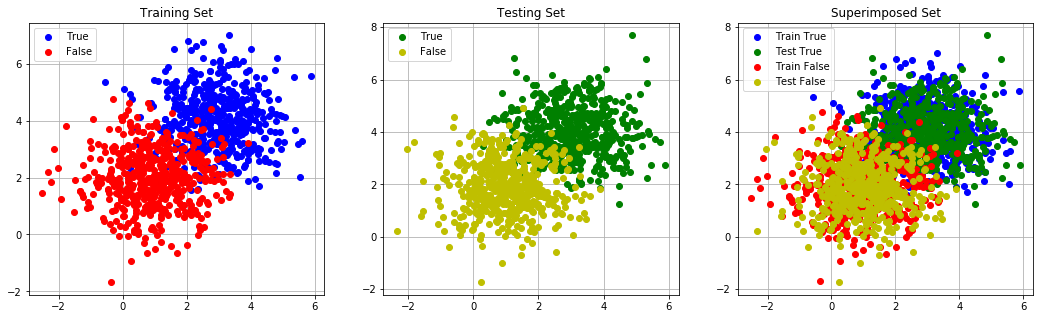

In [20]:
fig, ax_1st = plt.subplots(1,3,figsize=(18,5))
# fig.suptitle("DATA SET", fontsize='20')

ax_1st[0].set_title("Training Set")
ax_1st[0].plot(train_true[0], train_true[1],'bo', label='True')
ax_1st[0].plot(train_false[0], train_false[1],'ro', label='False')
ax_1st[0].grid(True)
ax_1st[0].legend()

ax_1st[1].set_title("Testing Set")
ax_1st[1].plot(test_true[0], test_true[1],'go', label='True')
ax_1st[1].plot(test_false[0], test_false[1],'yo', label='False')
ax_1st[1].grid(True)
ax_1st[1].legend()

ax_1st[2].set_title("Superimposed Set")
ax_1st[2].plot(train_true[0], train_true[1],'bo', label='Train True')
ax_1st[2].plot(test_true[0], test_true[1],'go', label='Test True')
ax_1st[2].plot(train_false[0], train_false[1],'ro', label='Train False')
ax_1st[2].plot(test_false[0], test_false[1],'yo', label='Test False')
ax_1st[2].grid(True)
ax_1st[2].legend()

plt.show()

In [31]:
LEARNING_RATE = 0.1
ITERATIONS = 200

b = 0
w = np.zeros((2,1))
X = np.concatenate((train_true,train_false), axis=1)
X_test = np.concatenate((test_true,test_false), axis=1)

train_loss = np.zeros((2,ITERATIONS))
train_accuracy = np.zeros((2,ITERATIONS))
test_loss = np.zeros((2,ITERATIONS))
test_accuracy = np.zeros((2,ITERATIONS))

for i in range(ITERATIONS):
    J = 0
    dw = np.zeros((2,1))
    db = 0
    
    z = np.dot(w.T, X) + b
    A = 1/(1 + np.exp(-z)) # Sigmoid 함수 적용(0 ~ 1)
    
    # APPLY GRADIENT DESCENT ALGORITHM
    dz = A-Y
    dw = np.dot(X,dz.T)/NUMOFDATA
    db = np.sum(dz)/NUMOFDATA
    
    w = w - LEARNING_RATE*dw
    b = b - LEARNING_RATE*db
    
    # FOR TRAIN LOSS
    J = (np.dot(Y, (np.log(A)).T) + np.dot(1-Y, (np.log(1-A)).T))
    J = -np.sum(J)/NUMOFDATA
    train_loss[0][i] = i+1
    train_loss[1][i] = J
    
    # FOR TRAIN ACCURACY
    temp = A.tolist()
    for x in range(NUMOFDATA):
        if temp[0][x] >= 0.5:
            temp[0][x] = 1
        else:
            temp[0][x] = 0
    
    correct = 0
    temp2 = Y.tolist()
    for x in range(NUMOFDATA):
        if temp[0][x] == Y[0][x]:
            correct += 1
        
    train_accuracy[0][i] = i+1
    train_accuracy[1][i] = correct/NUMOFDATA
    
    # FOR TEST LOSS
    z = np.dot(w.T, X_test) + b
    A = 1/(1 + np.exp(-z)) # Sigmoid 함수 적용(0 ~ 1)
    
    J = (np.dot(Y, (np.log(A)).T) + np.dot(1-Y, (np.log(1-A)).T))
    J = -np.sum(J)/NUMOFDATA
    test_loss[0][i] = i+1
    test_loss[1][i] = J
    
    # FOR TEST ACCURACY
    temp = A.tolist()
    for x in range(NUMOFDATA):
        if temp[0][x] >= 0.5:
            temp[0][x] = 1
        else:
            temp[0][x] = 0
    
    correct = 0
    temp2 = Y.tolist()
    for x in range(NUMOFDATA):
        if temp[0][x] == Y[0][x]:
            correct += 1
        
    test_accuracy[0][i] = i+1
    test_accuracy[1][i] = correct/NUMOFDATA

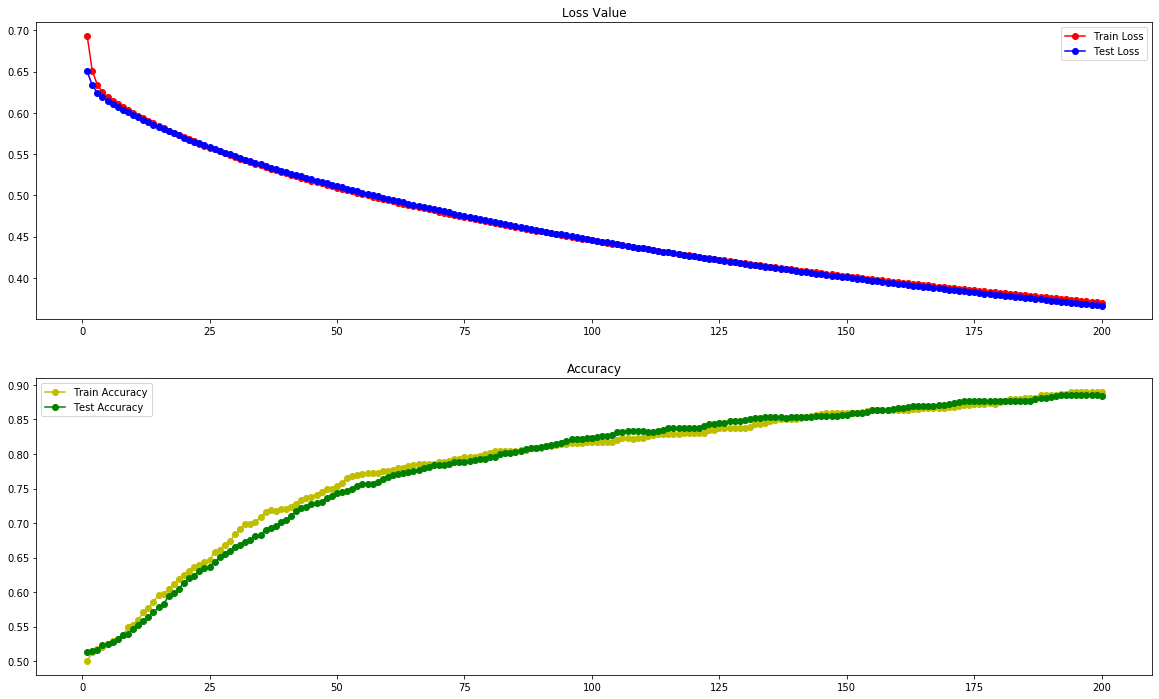

In [32]:
fig, ax_2nd = plt.subplots(2,1,figsize=(20, 12))
ax_2nd[0].set_title("Loss Value")
ax_2nd[0].plot(train_loss[0], train_loss[1],'-ro', label='Train Loss')
ax_2nd[0].plot(test_loss[0], test_loss[1], '-bo', label='Test Loss')
ax_2nd[0].legend()

ax_2nd[1].set_title("Accuracy")
ax_2nd[1].plot(train_accuracy[0], train_accuracy[1], '-yo', label='Train Accuracy')
ax_2nd[1].plot(test_accuracy[0], test_accuracy[1], '-go', label='Test Accuracy')
ax_2nd[1].legend()
plt.show()